In [56]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import fastmri
from fastmri.data import transforms

In [57]:
file = 'file_brain_AXT2_207_2070513.h5'
hf = h5py.File(file)

print(f'Keys: {list(hf.keys())}')
print(f'Attr: {dict(hf.attrs)}')

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_rss']
Attr: {'acquisition': 'AXT2', 'max': 0.0008540082454876932, 'norm': 0.16063199405175274, 'patient_id': '2070513'}


In [58]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(16, 4, 640, 320)


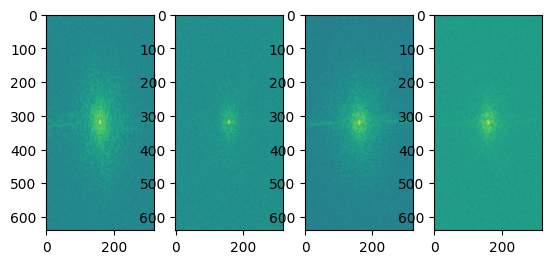

In [59]:
slice_kspace = volume_kspace[8] # select 8th slice of volume

# function to plot absolute value of k-space
def show_coils(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i+1)
        plt.imshow(data[num], cmap=cmap)
    plt.show()

show_coils(np.log(np.abs(slice_kspace) + 1e-9), [0, 1, 2, 3])

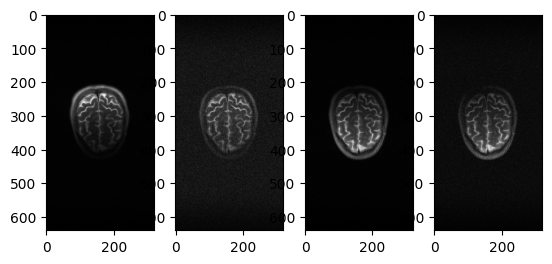

In [60]:
slice_kspace2 = transforms.to_tensor(slice_kspace)  # np array to pytorch tensor
slice_image = fastmri.ifft2c(slice_kspace2)         # inverse fourier to get complex img          
slice_image_abs = fastmri.complex_abs(slice_image)  # absolute value of img

# slice_image = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(slice_kspace)))
# slice_image_abs = np.abs(slice_image)

show_coils(slice_image_abs, [0, 1, 2, 3], cmap='gray')

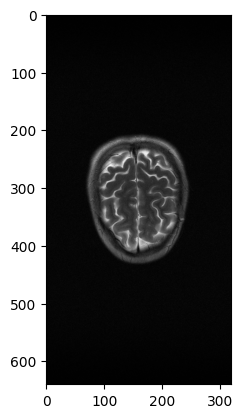

In [61]:
slice_image_rss = fastmri.rss(slice_image_abs, dim=0)
plt.imshow(np.abs(slice_image_rss.numpy()), cmap='gray')